<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/_projects/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('./data/diabetes_feature.csv')
df.shape

(768, 16)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [7]:
y=df['Outcome']
y.shape

(768,)

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42)

In [9]:
X_test.shape,y_test.shape

((154, 9), (154,))

# Boosting

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [12]:
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [15]:
model.feature_importances_

array([1.06409948e-01, 7.36703076e-03, 6.58515012e-02, 3.75238192e-02,
       2.59581240e-02, 9.46974408e-02, 1.56708089e-04, 6.62035427e-01,
       0.00000000e+00])

In [13]:
feature_names=X_train.columns.tolist()

<Axes: >

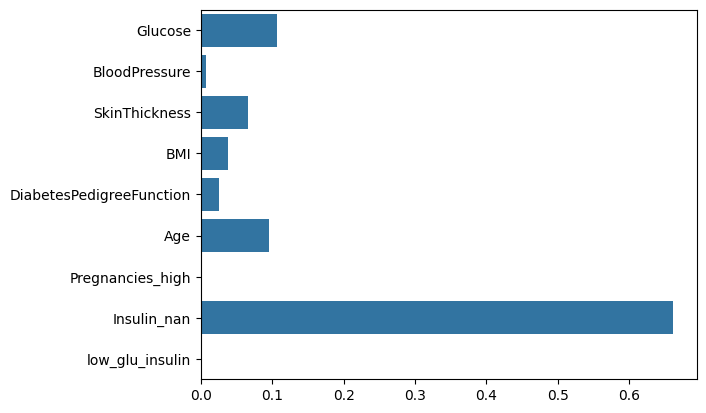

In [14]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [20]:
y_predict=model.predict(X_test)
print(y_predict[:5])
print(y_test.values[:5])

[1 0 0 0 0]
[0 0 0 0 0]


In [21]:
(y_predict!=y_test.values).sum()

24

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.8441558441558441